In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


In [3]:
data_path = '../data/PEMS07/PEMS07.csv'
df = pd.read_csv(data_path)

Number of anomalies detected: 9


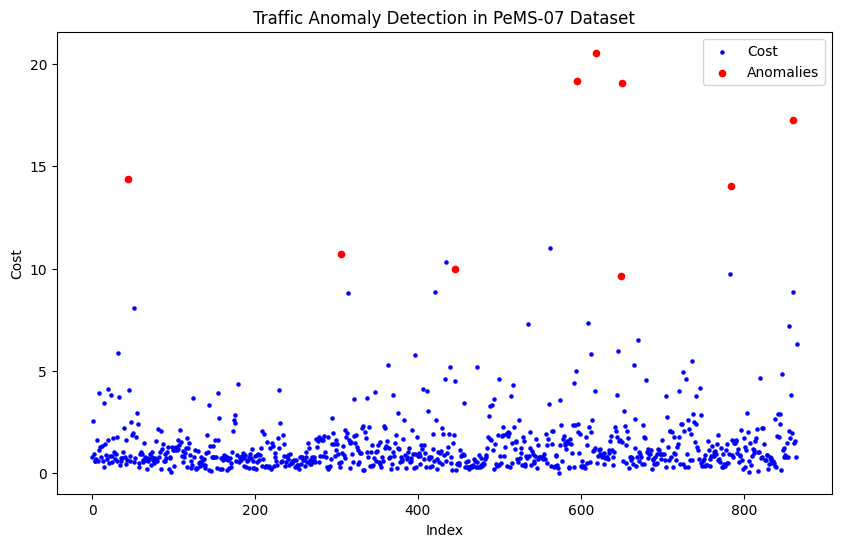

In [5]:

features = df[['from', 'to', 'cost']]

model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(features)
df['anomaly'] = model.predict(features)
df['anomaly'] = df['anomaly'].apply(lambda x: 1 if x == -1 else 0)

anomalies = df[df['anomaly'] == 1]
print(f'Number of anomalies detected: {len(anomalies)}')

# Visualize the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['cost'], label='Cost', color='blue', s=5)
plt.scatter(anomalies.index, anomalies['cost'], color='red', label='Anomalies', s=20)
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Traffic Anomaly Detection in PeMS-07 Dataset')
plt.legend()
plt.show()